# Thresholding a dark background

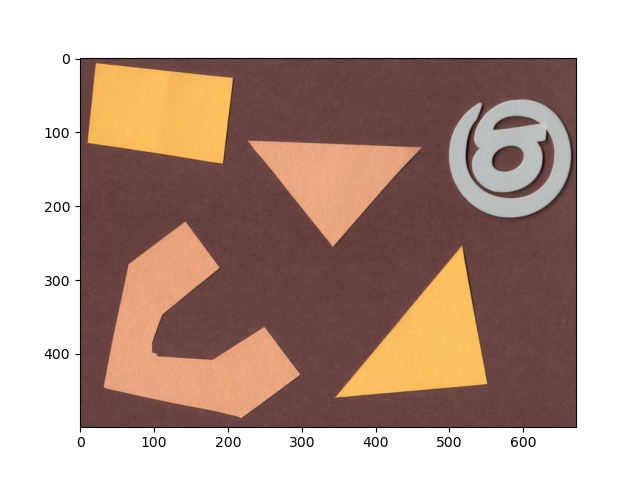

In [23]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

# load the image
shapes01 = iio.imread(uri="../data/raw/training/shapes-02.jpg")

fig, ax = plt.subplots()
ax.imshow(shapes01)

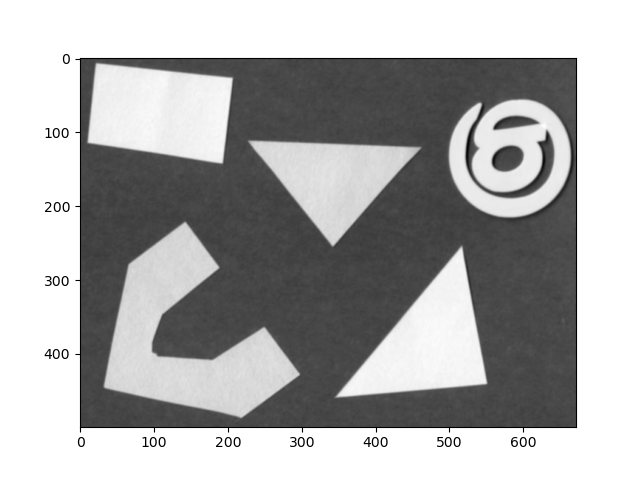

In [24]:
# convert the image to grayscale
gray_shapes = ski.color.rgb2gray(shapes01)

# blur the image to denoise, don't include noise in the histor
blurred_shapes = ski.filters.gaussian(gray_shapes, sigma=1.0)

fig, ax = plt.subplots()
ax.imshow(blurred_shapes, cmap="gray")

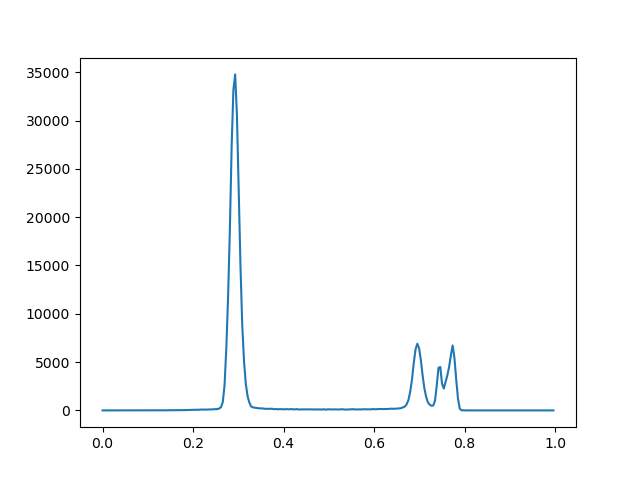

In [25]:
histogram, bin_edges = np.histogram(blurred_shapes, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histogram)

The threshold you choose is going to depend on the use case.

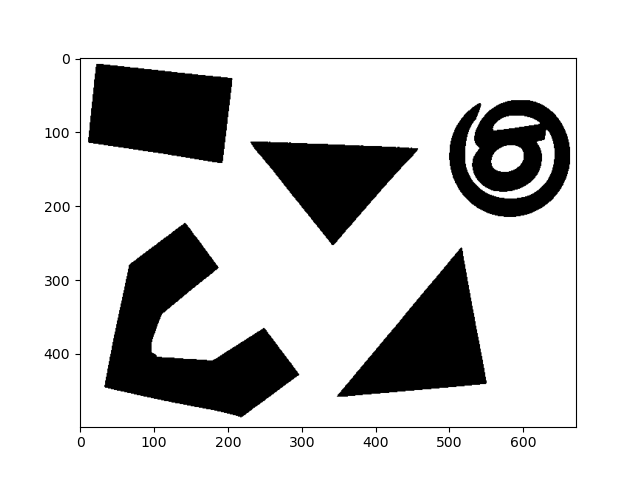

In [26]:
t = 0.6
binary_mask = blurred_shapes < t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

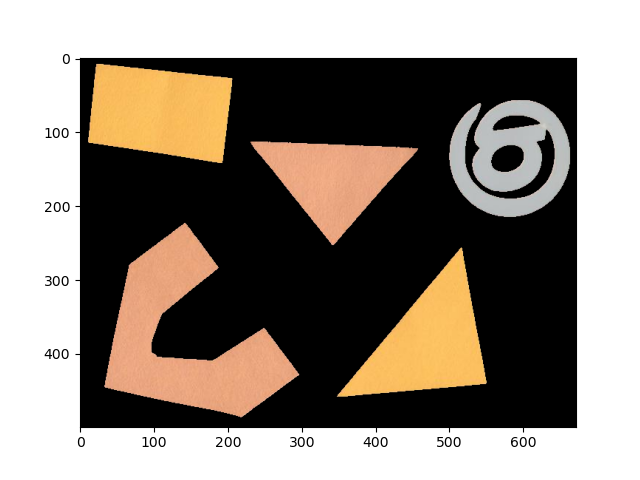

In [27]:
selection = shapes01.copy()
selection[binary_mask] = 0

fig, ax = plt.subplots()
ax.imshow(selection)